
<img src="https://raw.githubusercontent.com/georsan/Soccer-Predictor/main/Soccer-predictor.jpeg"  width="800px" height="300px">

---




**MONTAR DRIVE CON PARAMETROS**

In [ ]:
import os
from google.colab import drive

path_ai = "Proyecto 2021-2 | IA" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive/')
os.chdir(path)
print(os.getcwd())

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Proyecto 2021-2 | IA


# **Importando librerias**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
import tensorflow as tf



#**Cargar el dataset**

In [ ]:
partidos  =  pd.read_csv("/content/drive/My Drive/appearances.csv")
partidos

,gameID,playerID,goals,ownGoals,shots,xGoals,xGoalsChain,xGoalsBuildup,assists,keyPasses,xAssists,position,positionOrder,yellowCard,redCard,time,substituteIn,substituteOut,leagueID
0,81,560,0,0,0,0.000000,0.000000,0.000000,0,0,0.000000,GK,1,0,0,90,0,0,1
1,81,557,0,0,0,0.000000,0.106513,0.106513,0,1,0.106513,DR,2,0,0,82,222605,0,1
2,81,548,0,0,0,0.000000,0.127738,0.127738,0,0,0.000000,DC,3,0,0,90,0,0,1
3,81,628,0,0,0,0.000000,0.106513,0.106513,0,0,0.000000,DC,3,0,0,90,0,0,1
4,81,1006,0,0,0,0.000000,0.021225,0.021225,0,0,0.000000,DL,4,0,0,90,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356508,16135,3509,0,0,1,0.028713,0.058495,0.058495,0,0,0.000000,MC,9,0,0,90,0,0,5
356509,16135,4882,0,0,1,0.013482,0.058495,0.045374,0,2,0.058495,MC,9,0,0,90,0,0,5
356510,16135,5786,0,0,0,0.000000,0.045374,0.045374,0,0,0.000000,FW,15,0,0,90,0,0,5
356511,16135,8997,0,0,0,0.000000,0.000000,0.000000,0,0,0.000000,FW,15,0,0,78,474075,0,5


# **Tamaño del dataset**

In [ ]:
partidos.shape

(356513, 19)

# **Correlación**

La correlación se realiza para visualizar e inferir qué clases se pueden tomar como importantes antes de empezar el proceso de regresión.

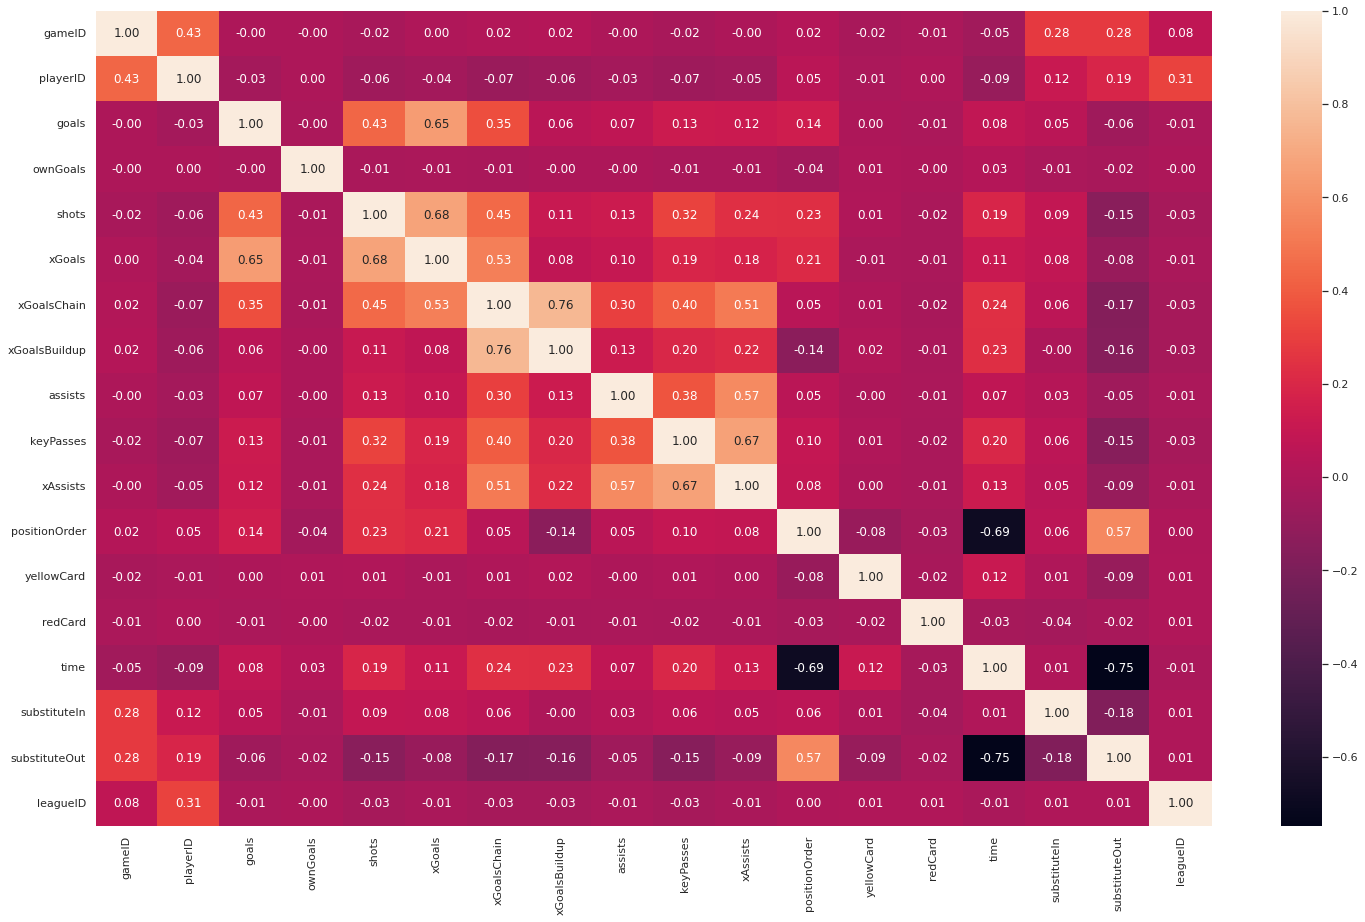

In [ ]:
plt.subplots(figsize=(25, 15)) #Importante para que se vean todas las correlaciones
corr = partidos.corr()
sns.heatmap(corr, annot=True, fmt=".2f")



---



# **Se toma todas las columnas del dataset**
En este proyecto se trabajara sobre los partidos de la Premier League, se toma la columna **goals** como el grand truth.

In [ ]:
apariciones = partidos[partidos.leagueID == 1]
#X_todasColumnas = apariciones[["gameID","playerID","ownGoals","shots","xGoals","xGoalsChain","xGoalsBuildup","assists","keyPasses","xAssists","positionOrder","yellowCard","redCard","time","substituteIn","substituteOut"]]
X_todasColumnas = apariciones[["ownGoals","shots","xGoals","xGoalsChain","xGoalsBuildup","assists","keyPasses","xAssists","positionOrder","yellowCard","redCard","time","substituteIn","substituteOut"]]
#X= apariciones.values[:,[0,1,3,4,5,6,7,8,9,10,12,13,14,15,16,17]]
X_todasColumnas

,ownGoals,shots,xGoals,xGoalsChain,xGoalsBuildup,assists,keyPasses,xAssists,positionOrder,yellowCard,redCard,time,substituteIn,substituteOut
0,0,0,0.000000,0.000000,0.000000,0,0,0.000000,1,0,0,90,0,0
1,0,0,0.000000,0.106513,0.106513,0,1,0.106513,2,0,0,82,222605,0
2,0,0,0.000000,0.127738,0.127738,0,0,0.000000,3,0,0,90,0,0
3,0,0,0.000000,0.106513,0.106513,0,0,0.000000,3,0,0,90,0,0
4,0,0,0.000000,0.021225,0.021225,0,0,0.000000,4,0,0,90,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316332,0,1,0.369126,0.956896,0.408465,1,3,0.587769,13,0,0,90,473500,0
316333,0,2,0.551871,0.842046,0.821321,0,1,0.020726,15,0,0,90,0,0
316334,0,0,0.000000,0.000000,0.000000,0,0,0.000000,17,0,0,3,0,473497
316335,0,0,0.000000,0.000000,0.000000,0,0,0.000000,17,0,0,1,0,473498


#**Grand Truth**

In [ ]:
y = apariciones["goals"]
y.shape

(73305,)

# **75% del dataset entrenamiento**





In [ ]:
X_trainT, X_testT, y_trainT, y_testT = train_test_split(X_todasColumnas, y, test_size = 0.25, random_state=21, shuffle=False)

# **Feature importances**

In [ ]:
regresor1 = DecisionTreeRegressor(max_depth=10, random_state=21)
regresor1.fit(X_trainT, y_trainT)
importancias = regresor1.feature_importances_
mejores = np.argsort(importancias)[::-1][:3]
total = np.argsort(X_todasColumnas)

X_Mejores = X_todasColumnas.iloc[:,mejores]
X_trainM, X_testM, y_trainM, y_testM = train_test_split(X_Mejores, y, test_size = 0.25, random_state=21, shuffle=False)

X_Mejores


,xGoals,xGoalsChain,xAssists
0,0.000000,0.000000,0.000000
1,0.000000,0.106513,0.106513
2,0.000000,0.127738,0.000000
3,0.000000,0.106513,0.000000
4,0.000000,0.021225,0.000000
...,...,...,...
316332,0.369126,0.956896,0.587769
316333,0.551871,0.842046,0.020726
316334,0.000000,0.000000,0.000000
316335,0.000000,0.000000,0.000000


# **Decision Tree.**

- Todas las columnas.

In [ ]:
prediccion = regresor1.predict(X_testT)

s = cross_val_score(regresor1, X_todasColumnas, y, cv=KFold(10, shuffle=False), scoring=make_scorer(mean_squared_error))
print ("MSE depth: 25 %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
metrica = mean_squared_error(y_testT, prediccion)
print (metrica)

MSE depth: 25 0.075 (+/- 0.00439)
0.08428678401849887


- Mejores columnas.

In [ ]:
regresor1M = DecisionTreeRegressor(max_depth=10, random_state=21)
regresor1M.fit(X_trainM, y_trainM)
prediccion = regresor1M.predict(X_testM)

s = cross_val_score(regresor1M, X_Mejores, y, cv=KFold(10, shuffle=False), scoring=make_scorer(mean_squared_error))
print ("MSE depth: 25 %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
metricaM = mean_squared_error(y_testM, prediccion)
print (metricaM)

MSE depth: 25 0.074 (+/- 0.00389)
0.0748456681260858


Ahora, ejecutando este código obtendrá el MSE del Random Forest.

#**Random Forest Regressor**

- Todas las columnas.

In [ ]:
regresor2 = RandomForestRegressor(random_state=21)
regresor2.fit(X_trainT, y_trainT)
prediccion = regresor2.predict(X_testT)

mse_rf = mean_squared_error(y_testT, regresor2.predict(X_testT))
print(mse_rf)

0.07363449009657881


- Mejores columnas.

In [ ]:
regresor2M = RandomForestRegressor(random_state=21)
regresor2M.fit(X_trainM, y_trainM)
prediccion = regresor2M.predict(X_testM)

mse_rfM = mean_squared_error(y_testM, regresor2M.predict(X_testM))
print(mse_rfM)

0.07531447318123646


#**SVR**

- Todas las columnas.

In [ ]:
np.random.seed(10)

regresor3 = SVR()
regresor3.fit(X_trainT, y_trainT)
prediccion = regresor3.predict(X_testT)

mse_svr = mean_squared_error(y_testT, regresor3.predict(X_testT))
print(mse_svr)

0.1074215375287784


- Mejores columnas.

In [ ]:
np.random.seed(10)

regresor3M = SVR()
regresor3M.fit(X_trainM, y_trainM)
prediccion = regresor3M.predict(X_testM)

mse_svrM = mean_squared_error(y_testM, regresor3M.predict(X_testM))
print(mse_svrM)

0.0762347173447161


#**RED NEURONAL**

- Todas las columnas.

In [ ]:
np.random.seed(10)

dnnr = tf.keras.Sequential([
                            tf.keras.layers.Flatten( input_shape=[14]),
                            tf.keras.layers.Dense(128, activation=tf.nn.tanh),
                            tf.keras.layers.Dense(64, activation=tf.nn.tanh),
                            tf.keras.layers.Dense(32, activation=tf.nn.tanh),
                            tf.keras.layers.Dense(1)])
    
dnnr.compile(optimizer=tf.keras.optimizers.RMSprop(), 
             loss='mae',
             metrics=['mse'])
history = dnnr.fit(X_trainT, y_trainT, epochs=10, batch_size=10)
yest = dnnr.predict(X_testT)
scores = dnnr.evaluate(X_testT, y_testT)

Epoch 1/10
5498/5498 [==============================] - 13s 2ms/step - loss: 0.1109 - mse: 0.1148
Epoch 2/10
5498/5498 [==============================] - 11s 2ms/step - loss: 0.1032 - mse: 0.1076
Epoch 3/10
5498/5498 [==============================] - 11s 2ms/step - loss: 0.1026 - mse: 0.1058
Epoch 4/10
5498/5498 [==============================] - 11s 2ms/step - loss: 0.1017 - mse: 0.1052
Epoch 5/10
5498/5498 [==============================] - 11s 2ms/step - loss: 0.1011 - mse: 0.1026
Epoch 6/10
5498/5498 [==============================] - 11s 2ms/step - loss: 0.1003 - mse: 0.1022
Epoch 7/10
5498/5498 [==============================] - 11s 2ms/step - loss: 0.0995 - mse: 0.1014
Epoch 8/10
5498/5498 [==============================] - 11s 2ms/step - loss: 0.0993 - mse: 0.1021
Epoch 9/10
5498/5498 [==============================] - 11s 2ms/step - loss: 0.0993 - mse: 0.1015
Epoch 10/10
573/573 [==============================] - 1s 2ms/step - loss: 0.0918 - mse: 0.0928


In [ ]:
scores

[0.09182573854923248, 0.09280191361904144]

- Mejores columnas.

In [ ]:
np.random.seed(10)

dnnrM = tf.keras.Sequential([
                            tf.keras.layers.Flatten(input_shape=mejores.shape),
                            tf.keras.layers.Dense(128, activation=tf.nn.relu),
                            tf.keras.layers.Dense(64, activation=tf.nn.relu),
                            tf.keras.layers.Dense(32, activation=tf.nn.relu),
                            tf.keras.layers.Dense(1)])
    
dnnrM.compile(optimizer=tf.keras.optimizers.RMSprop(), 
             loss='mae',
             metrics=['mse'])
historyM = dnnrM.fit(X_trainM, y_trainM, epochs=10, batch_size=10)
yestM = dnnrM.predict(X_testM)
scoresM = dnnrM.evaluate(X_testM, y_testM)

    


Epoch 1/10
5498/5498 [==============================] - 12s 2ms/step - loss: 0.0841 - mse: 0.0813
Epoch 2/10
5498/5498 [==============================] - 11s 2ms/step - loss: 0.0820 - mse: 0.0803
Epoch 3/10
5498/5498 [==============================] - 11s 2ms/step - loss: 0.0813 - mse: 0.0807
Epoch 4/10
5498/5498 [==============================] - 10s 2ms/step - loss: 0.0811 - mse: 0.0824
Epoch 5/10
5498/5498 [==============================] - 12s 2ms/step - loss: 0.0813 - mse: 0.0821
Epoch 6/10
5498/5498 [==============================] - 13s 2ms/step - loss: 0.0804 - mse: 0.0819
Epoch 7/10
5498/5498 [==============================] - 10s 2ms/step - loss: 0.0802 - mse: 0.0819
Epoch 8/10
5498/5498 [==============================] - 11s 2ms/step - loss: 0.0802 - mse: 0.0817
Epoch 9/10
5498/5498 [==============================] - 11s 2ms/step - loss: 0.0804 - mse: 0.0831
Epoch 10/10
573/573 [==============================] - 1s 2ms/step - loss: 0.0815 - mse: 0.0810


In [ ]:
scoresM

[0.07977987825870514, 0.07937499135732651]

---

# ***Comparación de métricas***




In [ ]:
def show_curve(est):
    means, stds = [], []
    nfolds_range = range(2,10)
    for nfolds in nfolds_range:
        #print (nfolds,)
        s = cross_val_score(est, X_Mejores, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

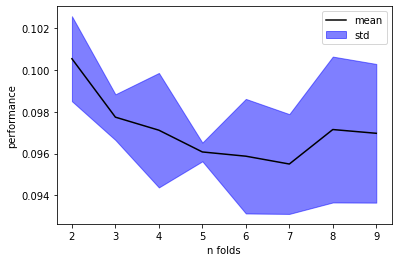

In [ ]:
from sklearn.model_selection import cross_val_score
show_curve(regresor1) 

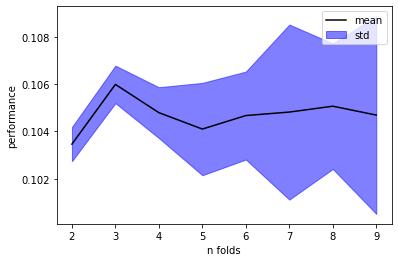

In [ ]:
from sklearn.model_selection import cross_val_score
show_curve(RandomForestRegressor()) 

Para la revisión gráfica del comportamiento del factor de perdida y la métrica (loss y mse), resultantes del método evaluate de la red neuronal correspondiente. 

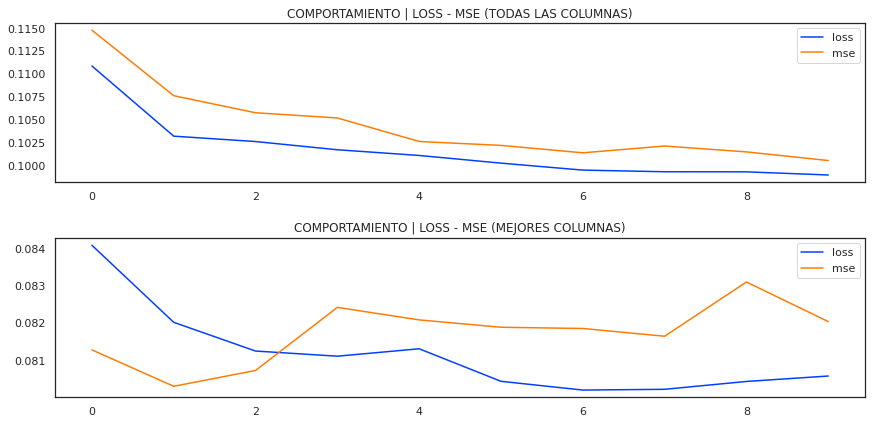

In [ ]:


plt.subplot(2, 1,1)
plt.title("COMPORTAMIENTO | LOSS - MSE (TODAS LAS COLUMNAS)")
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['mse'], label="mse")
plt.legend()

plt.subplot(2,1,2)
plt.title("COMPORTAMIENTO | LOSS - MSE (MEJORES COLUMNAS)")
plt.plot(historyM.history['loss'], label="loss")
plt.plot(historyM.history['mse'], label="mse")

plt.legend()


plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=2, 
                    top=1.4, 
                    wspace=0.2, 
                    hspace=0.35)

plt.show()

En esta representación se observa cómo es el comportamiento del experimento con respecto al número de K-Folds. 

Se presenta una variacion a medida que se va iterando el número de K-Flolds. Esto se implementa para poder hacer uso de los mejores parametros a introducir al estimador y tener un mejor resultado con más eficiencia y precisión.

---

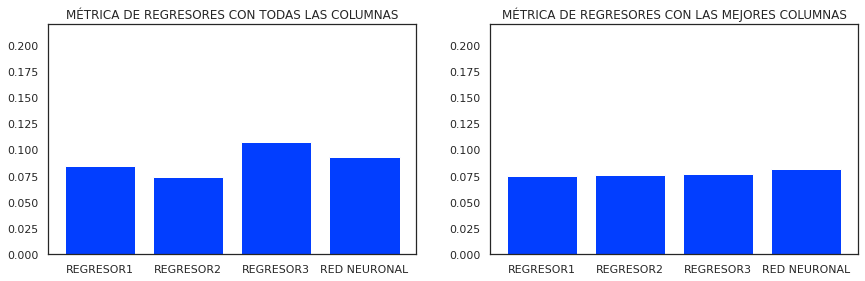

In [ ]:

fig, ax = plt.subplots(3,1)
custom_palette = sns.color_palette("bright", 9)
sns.set_theme(style="white", palette=custom_palette)

plt.subplot(1,2,1)
plt.title("MÉTRICA DE REGRESORES CON TODAS LAS COLUMNAS")
X = ['REGRESOR1', "REGRESOR2", "REGRESOR3", "RED NEURONAL"]
Y = [metrica, mse_rf, mse_svr, scores[1]]
plt.bar(X,Y)
plt.ylim(0,0.22)



plt.subplot(1,2,2)
plt.title("MÉTRICA DE REGRESORES CON LAS MEJORES COLUMNAS")
X = ['REGRESOR1', "REGRESOR2", "REGRESOR3", "RED NEURONAL"]
Y = [metricaM, mse_rfM, mse_svrM, scoresM[1]]
plt.bar(X,Y)
plt.ylim(0,0.22)

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

plt.show()

**Método más eficiente:** El método más eficiente fue el RandomForest para tratar todas las columnas, y en contraste en referencia a las columnas más importantes para establecer una regresión de goles en un partido de fútbol, las cuáles chances creadas, chances de asistencia y media de goles pre-existentese, fue mejor el regresor de Decision Tree.

Esta conclusión se sustenta en las caracteristicas cuantitativas de las métricas correspondientes a regresión, siendo considerada como más importante el Mean Squared Error (MSE) o error cuadrado medio.

In [ ]:
p = regresor2.predict(X_testT)

pr = np.array(y_testT)

print("Grand truth: ", pr[280])
print("Predicción: ", p[280])


print(" -----------")

p2 = regresor1M.predict(X_testM)



pr2 = np.array(y_testM)

print("Grand truth: ", pr2[144])
print("Predicción: ", p2[144])



Grand truth:  2
Predicción:  1.95
 -----------
Grand truth:  1
Predicción:  1.0146341463414634


<img src="https://i.pinimg.com/originals/a1/7a/79/a17a79b8e175b2af651d1de44ad28841.jpg" width=1000px height=600px>